<a href="https://colab.research.google.com/github/ZohrehFeridoun/ML_ex1/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1> 0) Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

<h1> PART1

<h2> 1) Loading dataset

In [ ]:
# loading dataset from csv file using pandas
### START CODE HERE ###
dataset = pd.read_csv('/content/frcities.csv')
### END OF SOLUTION ###
dataset

,city,lat,lng,iso2,density,population,ranking
0,Saint-Oblas,45.5674,5.0447,FR,129.2,NaN,4
1,Louresse,47.2394,-0.3136,FR,NaN,872.0,3
2,Olmet,45.7100,3.6614,FR,10.4,161.0,3
3,Olmet,44.9542,2.6108,FR,71.0,NaN,4
4,Gottenhouse,48.7208,7.3611,FR,305.6,382.0,3
...,...,...,...,...,...,...,...
59059,La Rochette,45.2609,6.2881,FR,55.5,NaN,4
59060,La Rochette,45.3056,3.4747,FR,14.4,NaN,4
59061,Saint-Eutrope,45.4181,0.1114,FR,62.9,168.0,3
59062,Saint-Eutrope,44.4535,0.5204,FR,34.2,NaN,4


In [ ]:
dataset.shape

(59064, 7)

<h2> 2) Dleting null values.</h2>
<h5>for further calculation we need to delete rows with null values!

In [ ]:
### START CODE HERE ###
dataset = dataset.dropna()
### END OF SOLUTION ###
#If there is a null value in dataset ,
#the number of rows must have decreased after removing them.
dataset.shape

(36090, 7)

In [ ]:
dataset = dataset.drop_duplicates(subset=['city'],keep='last')
dataset.shape

(33480, 7)

<h1> PART2

<h2> 3) Visualizing data

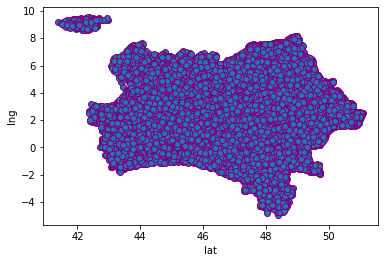

In [ ]:
### START CODE HERE ###
plt.scatter('lat', 'lng', data=dataset, edgecolor='Purple')
plt.xlabel('lat')
plt.ylabel('lng')
plt.show()

### END OF SOLUTION ###

<h2> 4) converting lat and long to KM

In [ ]:
lat_km=[]
lat_km = dataset['lat'].apply(lambda x: x*87)
dataset.insert(3, 'lat_km', lat_km, True)

In [ ]:
lng_km=[]
lng_km = dataset['lng'].apply(lambda x: x*110)
dataset.insert(4, 'lng_km', lng_km, True)

In [ ]:
dataset

,city,lat,lng,lat_km,lng_km,iso2,density,population,ranking
4,Gottenhouse,48.7208,7.3611,4238.7096,809.721,FR,305.6,382.0,3
5,Bergues,50.9686,2.4342,4434.2682,267.762,FR,2755.3,3637.0,2
7,Saint-Martin-d’Arrossa,43.2381,-1.3133,3761.7147,-144.463,FR,29.2,538.0,3
8,Marre,49.2111,5.3019,4281.3657,583.209,FR,16.0,163.0,3
9,Neuve-Maison,49.9303,4.0325,4343.9361,443.575,FR,72.9,614.0,3
...,...,...,...,...,...,...,...,...,...
59055,Neuvecelle,46.3950,6.6125,4036.3650,727.375,FR,769.0,3076.0,3
59056,Cognocoli-Monticchi,41.8283,8.9058,3639.0621,979.638,FR,4.8,171.0,3
59058,La Rochette,44.9161,4.2408,3907.7007,466.488,FR,4.3,60.0,3
59061,Saint-Eutrope,45.4181,0.1114,3951.3747,12.254,FR,62.9,168.0,3


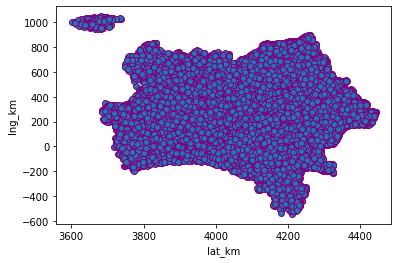

In [ ]:
#visualizing dataset after converting
### START CODE HERE ###
plt.scatter('lat_km', 'lng_km', data=dataset, edgecolor='Purple')
plt.xlabel('lat_km')
plt.ylabel('lng_km')
plt.show()

### END OF SOLUTION ###

<h1> PART3

<h2> 5) converting dataset to numpy array and given point to km

In [ ]:
### START CODE HERE ###
Lat_point = 44 * 87
Lng_point = -1.2 * 110
dataset_arr = dataset[['lat_km' , 'lng_km']].to_numpy()
### END OF SOLUTION ###

<h2> 6) Finding cities within a radius of 150 km

In [ ]:
### START CODE HERE ###
new_data=[]
a = 0
for x, y in dataset_arr:
  if (x-Lat_point)**2 + (y-Lng_point)**2 <= 150**2:
      new_data.append(dataset_arr[a])
  a+=1


### END OF SOLUTION ###


<h2> 7) convert the result to dataframe

In [ ]:
### START CODE HERE ###
new_dataset=pd.DataFrame(new_data, columns=['lat_km', 'lng_km'])
new_dataset=pd.merge(dataset, new_dataset, on=['lat_km', 'lng_km'])
### END OF SOLUTION ###

In [ ]:
new_dataset

,city,lat,lng,lat_km,lng_km,iso2,density,population,ranking
0,Saint-Martin-d’Arrossa,43.2381,-1.3133,3761.7147,-144.463,FR,29.2,538.0,3
1,Coutras,45.0408,-0.1289,3918.5496,-14.179,FR,254.7,8582.0,3
2,Bunus,43.2028,-1.0672,3758.6436,-117.392,FR,19.5,129.0,3
3,Plassac,45.4664,-0.5686,3955.5768,-62.546,FR,39.5,612.0,3
4,Mérignas,44.7844,-0.0878,3896.2428,-9.658,FR,36.0,344.0,3
...,...,...,...,...,...,...,...,...,...
1473,Saint-Antoine-du-Queyret,44.7631,0.0097,3894.3897,1.067,FR,8.5,58.0,3
1474,Béhorléguy,43.1286,-1.1186,3752.1882,-123.046,FR,3.5,73.0,3
1475,Langoiran,44.7075,-0.4011,3889.5525,-44.121,FR,211.0,2140.0,3
1476,Labescau,44.4442,-0.0889,3866.6454,-9.779,FR,20.5,123.0,3


<h2> 8) Calculate the population density and store it in the pop/dens column

In [ ]:
### START CODE HERE ###
new_dataset['pop / dens'] = new_dataset.population / new_dataset.density
### END OF SOLUTION ###

In [ ]:
new_dataset

,city,lat,lng,lat_km,lng_km,iso2,density,population,ranking,pop / dens
0,Saint-Martin-d’Arrossa,43.2381,-1.3133,3761.7147,-144.463,FR,29.2,538.0,3,18.424658
1,Coutras,45.0408,-0.1289,3918.5496,-14.179,FR,254.7,8582.0,3,33.694543
2,Bunus,43.2028,-1.0672,3758.6436,-117.392,FR,19.5,129.0,3,6.615385
3,Plassac,45.4664,-0.5686,3955.5768,-62.546,FR,39.5,612.0,3,15.493671
4,Mérignas,44.7844,-0.0878,3896.2428,-9.658,FR,36.0,344.0,3,9.555556
...,...,...,...,...,...,...,...,...,...,...
1473,Saint-Antoine-du-Queyret,44.7631,0.0097,3894.3897,1.067,FR,8.5,58.0,3,6.823529
1474,Béhorléguy,43.1286,-1.1186,3752.1882,-123.046,FR,3.5,73.0,3,20.857143
1475,Langoiran,44.7075,-0.4011,3889.5525,-44.121,FR,211.0,2140.0,3,10.142180
1476,Labescau,44.4442,-0.0889,3866.6454,-9.779,FR,20.5,123.0,3,6.000000


<h1> PART4 : Correlations

In [ ]:
### START CODE HERE ###
import scipy.stats as stats
# 9) pearson
pear1 = stats.pearsonr(new_dataset['pop / dens'], new_dataset['lat'])
pear1

PearsonRResult(statistic=0.09305725426428023, pvalue=0.0003405654176013505)

In [ ]:
# 9) pearson
pear2 = stats.pearsonr(new_dataset['population'], new_dataset['density'])
pear2

PearsonRResult(statistic=0.6942487095093045, pvalue=4.5966787563663275e-213)

In [ ]:
# 10) spearman
spear1 = stats.spearmanr(new_dataset['pop / dens'], new_dataset['lat'])
spear1

SignificanceResult(statistic=0.11307992952240019, pvalue=1.314743803657055e-05)

In [ ]:
# 10) spearman
spear2 = stats.spearmanr(new_dataset['population'], new_dataset['density'])
spear2

SignificanceResult(statistic=0.6949019135441343, pvalue=1.2592658613975068e-213)

In [ ]:
# 11) kendal tau
tau1 = stats.kendalltau(new_dataset['pop / dens'], new_dataset['lat'])
tau1

SignificanceResult(statistic=0.0807264217961902, pvalue=3.3318608096234885e-06)

In [ ]:
# 11) kendal tau
tau2 = stats.kendalltau(new_dataset['population'], new_dataset['density'])
tau2

SignificanceResult(statistic=0.5124939485787847, pvalue=3.336189469244618e-191)